# 0. Loading libraries




In [39]:
import numpy as np
import random
import pandas as pd

#graphs
import seaborn as sns
import matplotlib.pyplot as plt

#regression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report,  mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt




# 0.1. Loading data/ intial exploratory data analysis/ Summarising data


In [6]:
#### loading data set
df = pd.read_csv('/amazon.csv')

#### exploratory data analysis 1
print("Structure", df.info())
print("Sample_data - heads", df.head(), "Sample_data - tails", df.tail())
print("missing value %", (df.isnull().sum() / len(df)))
print("Summary stat", df.describe())

df[df.isnull().any(axis=1)] # displaying rows with missing values
df = df.dropna() # dropping rows with missing values
print("missing value %", (df.isnull().sum() / len(df)))
print("Structure", df.info())

# check for duplicates
print("duplicates", df.duplicated().sum()) # no of duplicates
print(df[df.duplicated()]) # see duplicated rows
df.drop_duplicates(inplace=True) # droping duplicated rows

# inspect basic statistics
print(df.describe(include='all'))
df[df['product_id'].duplicated(keep=False)].sort_values('product_id') # display duplicated product id rows
df = df.drop_duplicates(subset=['product_id'], keep='first') # keep one row per unique product_id




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [7]:
###Czary mary

#summary statistics  2
print(df.describe(include='all'))
print(df.describe())

#turning prices into numerical values
# Convert to string first, then remove ₹ and commas
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '')
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '')

# Convert to float safely
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

# Remove % from discount and convert to float
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# Convert rating to float safely
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Remove commas from rating_count and convert to int safely
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')






        product_id                                       product_name  \
count         1349                                               1349   
unique        1349                                               1335   
top     B01486F4G6  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             1                                                  5   

                                                 category discounted_price  \
count                                                1349             1349   
unique                                                211              549   
top     Computers&Accessories|Accessories&Peripherals|...             ₹299   
freq                                                  159               42   

       actual_price discount_percentage rating rating_count  \
count          1349                1349   1349         1349   
unique          449                  92     28         1117   
top            ₹999                 50%    4.1        

# 2. Summary stat 2

        product_id                                       product_name  \
count         1349                                               1349   
unique        1349                                               1335   
top     B01486F4G6  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             1                                                  5   
mean           NaN                                                NaN   
std            NaN                                                NaN   
min            NaN                                                NaN   
25%            NaN                                                NaN   
50%            NaN                                                NaN   
75%            NaN                                                NaN   
max            NaN                                                NaN   

                                                 category  discounted_price  \
count                                       

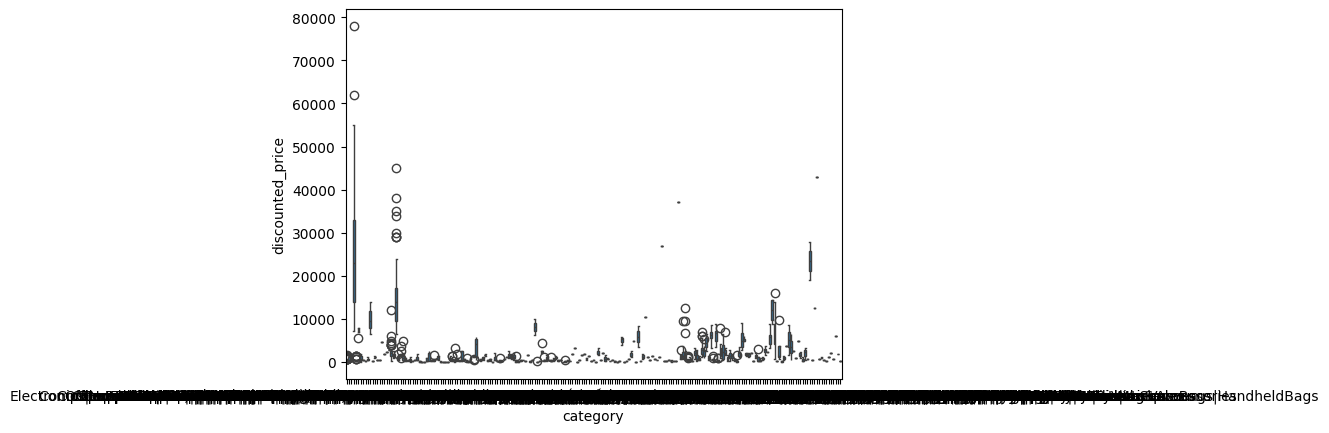

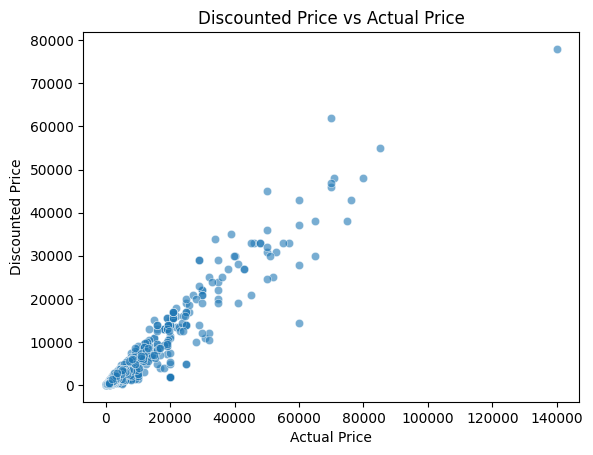

In [8]:

#summary statistics  2
print(df.describe(include='all'))
print(df.describe())

# mean/max/count price per category
df.groupby('category').agg({'discounted_price': ['mean', 'max', 'count']})

#pivot table
pd.pivot_table(df, values='discounted_price', index='category', aggfunc='mean')

#percentage share of each category
print(df['category'].value_counts(normalize=True) * 100)

#plots
#print(sns.histplot(df['discounted_price']))
sns.boxplot(x='category', y='discounted_price', data=df)
plt.show()
#print(sns.countplot(x='category', data=df))

##cross table
pd.crosstab(df['discounted_price'], df['rating'])
#mean  writing per price
df.groupby('discounted_price')['rating'].mean()

#5 top expensive and top 5
df.nlargest(5, 'discounted_price')   # top 5 most expensive
df.nsmallest(5, 'discounted_price')  # bottom 5

# discounted vs actual price graph
sns.scatterplot(x='actual_price', y='discounted_price', data=df, alpha=0.6)
plt.title('Discounted Price vs Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()

#from wide  to long format
#df_long = pd.melt(
 #   df,
  #  id_vars=['product_id'],           # columns to keep fixed
   # value_vars=['rating_2023', 'rating_2024'],  # columns to unpivot
    #var_name='year',                  # name for new “variable” column
    #value_name='rating'               # name for new “value” column
#)




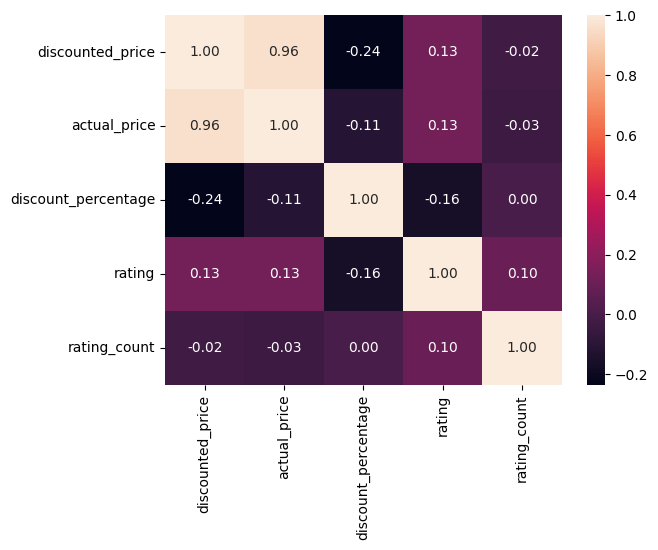

In [37]:
#correlation matrix/ heatmap
corr = df[["discounted_price","actual_price","discount_percentage","rating","rating_count"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f"); plt.show()


# 1. Handling multiple datasets

In [9]:
###### Merging data sets etc
## Dataset 1: product info
df_products = pd.DataFrame({
    'product_id': ['A1', 'A2', 'A3'],
    'product_name': ['Cable', 'Charger', 'Adapter'],
    'price': [10, 15, 12]
})
df_sales = pd.DataFrame({
    'product_id': ['A1', 'A2', 'A4'],
    'units_sold': [100, 150, 80]
})
df_products.info()
df_sales.info()

#  df_products['price'] = df_products['price'].astype('object') - making price as an object
%whos # listing variables in the memory

## merging datasets by common columns
df_merged = pd.merge(df_products, df_sales, on='product_id', how='inner')
#on='product_id' → match by that column; how='inner' → only keep products that exist in both datasets
#how='left'    # keep all rows from the left DataFrame  how='right'   # keep all rows from the right one how='outer'   # keep all rows from both (fill missing with NaN)
print(df_merged)


###### concentrating (stacking) data sets
df1 = pd.DataFrame({'city': ['London', 'Paris'], 'sales': [100, 200]})
df2 = pd.DataFrame({'city': ['Berlin', 'Madrid'], 'sales': [150, 250]})

combined_df = pd.concat([df1, df2], ignore_index=True)
print(combined_df)


###splitting dataset into two
product_columns = [
    'product_id', 'product_name', 'category', 'discounted_price',
    'actual_price', 'discount_percentage', 'rating', 'rating_count',
    'about_product', 'img_link', 'product_link'
]

df_products = df[product_columns]
## keeping first 5 first rows
df_products = df_products.head(5)
## keeping only when actual_price is 10 or 15
df_products = df_products[df_products['actual_price'].isin([10, 15])]
## keeping only when actual_price is between 10 and 15
df_products = df_products[(df_products['actual_price'] >= 10) & (df_products['actual_price'] <= 15)]







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    3 non-null      object
 1   product_name  3 non-null      object
 2   price         3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  3 non-null      object
 1   units_sold  3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes
No variables match your requested type.
  product_id product_name  price  units_sold
0         A1        Cable     10         100
1         A2      Charger     15         150
     city  sales
0  London    100
1   Paris    200
2  Berlin    150
3  Madrid    250


# 2. Additional statistical techniques

In [14]:
#corelation
df[['discounted_price', 'rating']].corr()

df.sample(5)

#mean by group
df.groupby('category')['rating'].mean()
df.sample(5)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
733,B0756CLQWL,Redgear Pro Wireless Gamepad with 2.4GHz Wirel...,Computers&Accessories|Accessories&Peripherals|...,1699.0,3999.0,58,4.2,25488,Gamepad comes equipped with2.4GHz wireless tec...,"AFR7NDA6QYOPSCNJIDXRDRHJIYXA,AHHCHJMZSYKSIE6TT...","Shafeer Pn,Sudhanshu S.,S U P E R M A N,Radhik...","R1CKJXFP143T9U,R31WPX3OC28CK7,R1S0S55YJ1UNXW,R...","Value for money,Very good.,Overall good but ve...","good gamepad, could've been better in ergonomi...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Redgear-Pro-Wireless-Gam...
483,B085CZ3SR1,Mi 10W Wall Charger for Mobile Phones with Mic...,Electronics|Mobiles&Accessories|MobileAccessor...,499.0,599.0,17,4.2,21916,Output Power : 10W with upto 480 mbps data tra...,"AHXMSMSLFDG7IIBBIVO6DY5RPVCA,AHD6BOJBLAFIBLI2K...","Rajan Raju,Ajay K.,Neki Bijarnia,Sahil Gupta,s...","R28SHHTDCYFLEK,RV4W2N7V5XWQ2,RVXZKH1V12BGV,R2I...","Nice one,Nice 👍 I'm happy,Best buy in the reas...","Ordinary,Nice pic 👍 I'm happy,Its original mi ...",https://m.media-amazon.com/images/I/31H8AoDYAY...,https://www.amazon.in/10W-Charger-Cable-Meter-...
1224,B08S6RKT4L,Balzano High Speed Nutri Blender/Mixer/Smoothi...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2599.0,4290.0,39,4.4,2116,Engineered & Designed in Italy and Made in Ind...,"AH2AVPUOI6A3TMI5OK6YM4II7HXA,AFY65T5MLGBO4CIMH...","Trusted User,Pardeep singh,Captain Retail,SIDD...","R3BIC1KGACDYI0,R1CCVQBZR4Q9VB,RZIRE8MUDAZ82,R1...",Good product but has a misleading information...,"Product is good, easy to use. But there is a m...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Balzano-Speed-Nutri-Blen...
927,B07NTKGW45,SaleOn™ Portable Storage Organizer Bag for Ear...,Computers&Accessories|Accessories&Peripherals|...,397.0,899.0,56,4.0,3025,Electronics accessories organizer provides exc...,"AGKYLNZN5SOR4LZAYWRHAAJY6JQQ,AF3KBDP4KUQBIEPOH...","Amazon Customer,Santos,CVN,anonymous,Sacchidan...","R3D7XJFJ5YMCGX,R1XFCHMC5NZ1Y5,R1CKJ6H0A3FZI0,R...","Good at this price,Good product to organize yo...",The product doesn't feel premium. I would say ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/SaleOnTM-Portable-Organi...
1204,B09KPXTZXN,Rico Japanese Technology Rechargeable Wireless...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,949.0,1999.0,53,4.0,1679,1 YEAR WARRANTY & AFTER SALES SERVICE: Reliabl...,"AHIJVXU2LMW6UBF6VPT4BGMBMYBA,AHFBBCPDGNSDA2ERI...","sharad shedge,Srushti Mali,Srivv,Fernandes,Nis...","RAYWMRZPZ14X1,R3DDSZWJ24VK4Z,R3SLQOT4AZDXOJ,R1...","Nice,👍,Very easy and useful, but too expensive...","Easy to use.,Worked so well..you can go for it...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Rico-Japanese-Technology...


# 3. Regression modelling

Intercept: 18379.484257581775
Coefficients: [-0.12941893  0.05266915]
R²: 0.0011884465591260884
RMSE: 42,105.0
MAE: 20,320.6


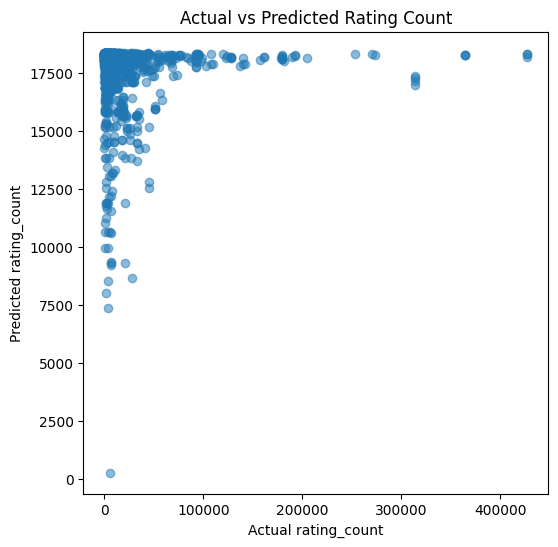

In [44]:
#linear regression
X = df[['actual_price', 'discount_percentage']]   # predictors
y = df['rating_count']                                      # target variable
model = LinearRegression()
model.fit(X, y)


print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

#to evaluate the model
y_pred = model.predict(X)
print("R²:", r2_score(y, y_pred))
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)

print(f"RMSE: {rmse:,.1f}")
print(f"MAE: {mae:,.1f}")

#plot regression vs real values
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual rating_count")
plt.ylabel("Predicted rating_count")
plt.title("Actual vs Predicted Rating Count")
# Add reference line (perfect prediction)
plt.show()


In [21]:
#linear regression:stat  model with p-values
X2 = df[['actual_price', 'discount_percentage']]
y2 = df['rating_count']

# Add constant (intercept term)
X2 = sm.add_constant(X2)

model = sm.OLS(y2, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           rating_count   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8008
Date:                Wed, 22 Oct 2025   Prob (F-statistic):              0.449
Time:                        08:44:35   Log-Likelihood:                -16278.
No. Observations:                1349   AIC:                         3.256e+04
Df Residuals:                    1346   BIC:                         3.258e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.838e+04   2

In [33]:
#binary regression
df['high_rating'] = np.where(df['rating'] >= 4, 1, 0)   # 1 if 4 or higher, 0 otherwise
X3 = df[['actual_price', 'discount_percentage']]
y3 = df['high_rating']


X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

coef = pd.DataFrame({
    'Feature': X3.columns,
    'Coefficient': log_model.coef_[0]
})
print(coef)


Accuracy: 0.4962962962962963
Confusion matrix:
 [[ 48  16]
 [120  86]]
              precision    recall  f1-score   support

           0       0.29      0.75      0.41        64
           1       0.84      0.42      0.56       206

    accuracy                           0.50       270
   macro avg       0.56      0.58      0.49       270
weighted avg       0.71      0.50      0.52       270

               Feature  Coefficient
0         actual_price     0.000040
1  discount_percentage    -0.012591
